#   Tarea 2

## Newton-Raphson
Nuestro código resuelve una ecuación o sistema de ecuaciones no lineales de la forma:

$$f(x)=0$$

donde $f$ y $x$ son vectores; usa el método de Newton-Raphson, que es iterativo.

### Un poco sobre el método

Dado un valor inicial $x_0$​, se mejora con esta fórmula:

$$x_{n+1}​=x_{n}​−J(x_{n}​)^{−1}⋅f(x_{n}​)$$

O equivalentemente:
$$J(x_n)⋅\Delta x=−f(x_n)\text{ luego }x_{n+1}=x_n+\Delta x$$

donde $J(x_{n}​)$ es la matriz Jacobiana de $f$, es decir:

$$J_{ij}=\frac{\partial f_i}{\partial x_j}​​$$

In [ ]:
import numpy as np

def newton_raphson_system(f, jacobian, x0, tol, max_iter):
    
    """
    Resuelve f(x)=0 usando el método de Newton-Raphson para funciones vectoriales.

    Parámetros:
        f: función que recibe un vector (np.ndarray) y retorna otro vector (np.ndarray) evaluando f(x).
        jacobian: función que recibe un vector (np.ndarray) y retorna la matriz Jacobiana evaluada en ese punto.
        x0: valor inicial (float).
        tol: tolerancia (float) para determinar la convergencia.
        max_iter: número máximo de iteraciones permitidas.

    Retorna:
        float: aproximación a la solución (la abscisa del punto de intersección).
    """
    # Convertimos x0 que es un escalar a un vector de un solo elemento para poder trabajar don funciones vectoriales.

    x = np.array([x0], dtype=float)
    
    for i in range(max_iter): # Iteraciones
        fx = f(x)
        # Condición de salida: norma de f(x) menor que tol
        if np.linalg.norm(fx, ord=2) < tol: # esto evalua si ||f(x)|| < tol, si es cierto, la solución está muy cerca de 0.
            print(f"Convergió en {i} iteraciones (norma f(x) < tol).")
            return x[0]
        
        Jx = jacobian(x)
        try:
            # Resolvemos Jx * delta = -f(x)
            delta = np.linalg.solve(Jx, -fx)
        except np.linalg.LinAlgError:
            raise ValueError(f"El Jacobiano es singular en la iteración {i}.")
        
        x = x + delta # actualizar el valor de x 
        # x_{n+1} = x_n + delta
        
        # Condición de salida: cambio en x menor que tol
        if np.linalg.norm(delta, ord=2) < tol:
            print(f"Convergió en {i+1} iteraciones (cambio en x < tol).") # si el cambio es muy pequeño, ya no vale la pena seguir iterando, osea, ya convergió.
            return x[0]
    
    raise ValueError("Se alcanzó el número máximo de iteraciones. No se encontró solución.")


Ejemplo

C:\Users\Usuario\AppData\Local\Temp\ipykernel_3304\2005976308.py:73: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  point.set_data(p2[0], p2[1])
C:\Users\Usuario\AppData\Local\Temp\ipykernel_3304\2005976308.py:76: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  final_point.set_data(sol[0], sol[1])


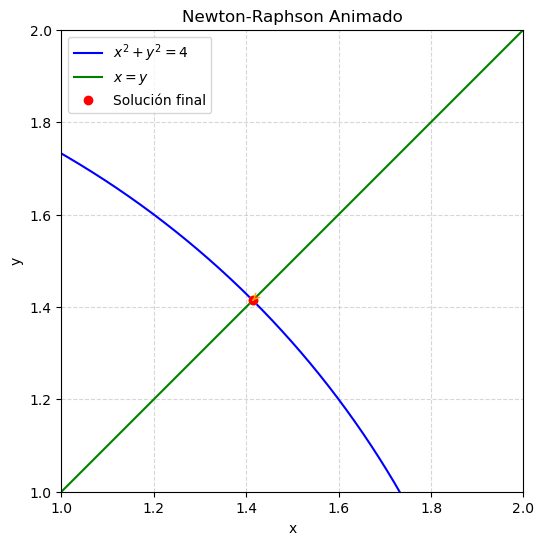

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Función y jacobiano
def f(v):
    x, y = v
    return np.array([
        x**2 + y**2 - 4,
        x - y
    ])

def jacobian(v):
    x, y = v
    return np.array([
        [2*x, 2*y],
        [1, -1]
    ])

# Newton-Raphson con historial
def newton_raphson_system(f, jacobian, x0, tol=1e-6, max_iter=50):
    x = np.array(x0, dtype=float)
    history = [x.copy()]
    for _ in range(max_iter):
        fx = f(x)
        if np.linalg.norm(fx) < tol:
            break
        Jx = jacobian(x)
        delta = np.linalg.solve(Jx, -fx)
        x = x + delta
        history.append(x.copy())
        if np.linalg.norm(delta) < tol:
            break
    return x, history

# Ejecutamos el método
x0 = [1.0, 1.0]
sol, steps = newton_raphson_system(f, jacobian, x0)
steps = np.array(steps)

# Setup de la figura
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_xlim(1, 2)
ax.set_ylim(1, 2)
ax.set_aspect('equal')
ax.grid(True, linestyle='--', alpha=0.5)
ax.set_title("Newton-Raphson Animado")
plt.xlabel("x")
plt.ylabel("y")

# Graficamos círculo y recta
theta = np.linspace(0, 2*np.pi, 400)
circle_x = 2 * np.cos(theta)
circle_y = 2 * np.sin(theta)
ax.plot(circle_x, circle_y, label=r"$x^2 + y^2 = 4$", color="blue")
line = np.linspace(-2.5, 2.5, 200)
ax.plot(line, line, label=r"$x = y$", color="green")

# Inicializar elementos animados
point, = ax.plot([], [], 'o', color="orange")
arrow = ax.annotate("", xy=(0,0), xytext=(0,0),
                    arrowprops=dict(arrowstyle="->", color="orange"))
final_point, = ax.plot([], [], 'ro', label="Solución final")

# Animación paso a paso
def update(frame):
    if frame == 0:
        point.set_data([], [])
        arrow.set_position((0,0))
        return point, arrow, final_point
    p1 = steps[frame - 1]
    p2 = steps[frame]
    point.set_data(p2[0], p2[1])
    arrow.set_position((p1[0], p1[1]))
    arrow.xy = (p2[0], p2[1])
    final_point.set_data(sol[0], sol[1])
    return point, arrow, final_point

ani = animation.FuncAnimation(fig, update, frames=len(steps), interval=800, blit=True, repeat=False)
plt.legend()

# Guardar el gif
ani.save("newton_raphson_animado.gif", writer='pillow', fps=1)
plt.show()



El punto de intersección de las curvas $y=\cos(x)$ y $y=x^3-1$

Convergió en 3 iteraciones (norma f(x) < tol).
El punto de intersección se encuentra en:
x = 1.1265619251439716
y = 0.4297667169786677


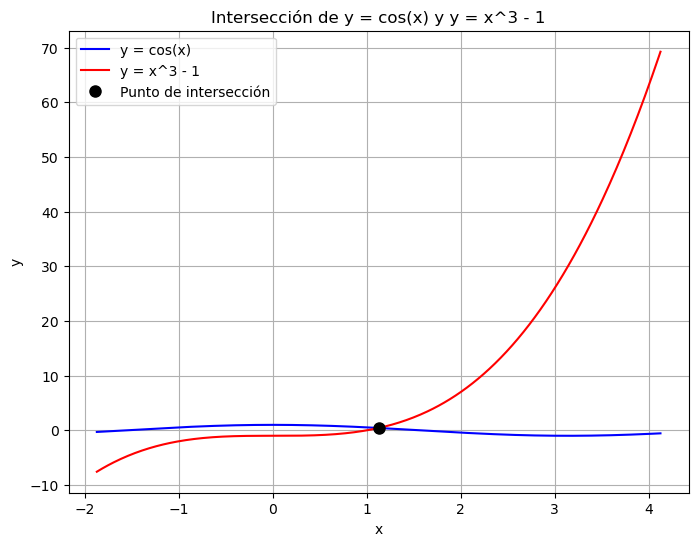

In [34]:
import numpy as np

def newton_raphson_system(f, jacobian, x0, tol, max_iter):
    """
    Resuelve f(x)=0 usando el método de Newton-Raphson para funciones vectoriales.
    En este caso, se adapta para una función escalar (con f: ℝ → ℝ, pero representada como vector de 1 elemento).

    Parámetros:
        f: función que recibe un vector (np.ndarray) y retorna otro vector (np.ndarray) evaluando f(x).
           Para nuestro problema: f(x) = cos(x) - (x^3 - 1)
        jacobian: función que recibe un vector (np.ndarray) y retorna la matriz Jacobiana evaluada en ese punto.
                  Para nuestro problema: f'(x) = -sin(x) - 3x^2, que se representará como una matriz 1x1.
        x0: valor inicial (float).
        tol: tolerancia (float) para determinar la convergencia.
        max_iter: número máximo de iteraciones permitidas.

    Retorna:
        float: aproximación a la solución (la abscisa del punto de intersección).
    """
    # Convertimos x0 a un vector de un solo elemento
    x = np.array([x0], dtype=float)
    
    for i in range(max_iter):
        fx = f(x)
        # Condición de salida: norma de f(x) menor que tol
        if np.linalg.norm(fx, ord=2) < tol:
            print(f"Convergió en {i} iteraciones (norma f(x) < tol).")
            return x[0]
        
        Jx = jacobian(x)
        try:
            # Resolvemos Jx * delta = -f(x)
            delta = np.linalg.solve(Jx, -fx)
        except np.linalg.LinAlgError:
            raise ValueError(f"El Jacobiano es singular en la iteración {i}.")
        
        x = x + delta
        
        # Condición de salida: cambio en x menor que tol
        if np.linalg.norm(delta, ord=2) < tol:
            print(f"Convergió en {i+1} iteraciones (cambio en x < tol).")
            return x[0]
    
    raise ValueError("Se alcanzó el número máximo de iteraciones. No se encontró solución.")

# Definición de f y de su Jacobiana adaptadas para trabajar con vectores de un elemento.
def f(vec):
    # vec es un np.ndarray de un elemento; extraemos x
    x = vec[0]
    return np.array([np.cos(x) - (x**3 - 1)])

def jacobian(vec):
    x = vec[0]
    return np.array([[-np.sin(x) - 3*x**2]])

# Parámetros del método
x0 = 1.0        # Valor inicial (podemos experimentar con otros valores)
tol = 1e-6      # Tolerancia
max_iter = 100  # Número máximo de iteraciones

# Hallamos la solución
solution = newton_raphson_system(f, jacobian, x0, tol, max_iter)
print("El punto de intersección se encuentra en:")
print("x =", solution)
print("y =", np.cos(solution))

# Graficar las curvas y el punto de intersección
plt.figure(figsize=(8, 6))
plt.plot(x_vals, y1_vals, label='y = cos(x)', color='blue')
plt.plot(x_vals, y2_vals, label='y = x^3 - 1', color='red')
plt.plot(root, y_intersect, 'ko', label='Punto de intersección', markersize=8)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Intersección de y = cos(x) y y = x^3 - 1')
plt.legend()
plt.grid(True)
plt.show()

Encuentra el valor de ${x,y,z}$ que cumple con $$\begin{aligned}z&=1-5exp\bigg(-\frac{x^2+y^2}{2}\bigg)\\z&=-x^2-y^2\\x+y&=1\end{aligned}$$

In [35]:
import numpy as np

def newton_raphson_system(f, jacobian, x0, tol, max_iter):
    """
    Resuelve un sistema de ecuaciones no lineales f(x)=0 usando el método de Newton-Raphson.

    Parámetros:
        f: función que recibe un vector (np.ndarray) y retorna otro vector (np.ndarray) evaluando f(x).
        jacobian: función que recibe un vector (np.ndarray) y retorna la matriz Jacobiana evaluada en ese punto.
        x0: vector inicial (lista o np.ndarray) con la aproximación inicial.
        tol: tolerancia (float) para determinar la convergencia.
        max_iter: número máximo de iteraciones permitidas.

    Retorna:
        np.ndarray: aproximación a la solución del sistema.
        
    Lanza ValueError si se alcanza el máximo número de iteraciones o si la matriz Jacobiana es singular.
    """
    x = np.array(x0, dtype=float)
    
    for i in range(max_iter):
        fx = f(x)
        # Condición de salida: si la norma de f(x) es menor que la tolerancia
        if np.linalg.norm(fx, ord=2) < tol:
            print(f"Convergió en {i} iteraciones (norma f(x) < tol).")
            return x
        
        Jx = jacobian(x)
        try:
            # Resolvemos el sistema Jx * delta = -f(x)
            delta = np.linalg.solve(Jx, -fx)
        except np.linalg.LinAlgError:
            raise ValueError(f"El Jacobiano es singular en la iteración {i}.")
        
        x = x + delta
        
        # Condición de salida adicional: si el cambio es menor que la tolerancia
        if np.linalg.norm(delta, ord=2) < tol:
            print(f"Convergió en {i+1} iteraciones (cambio en x < tol).")
            return x
    
    raise ValueError("Se alcanzó el número máximo de iteraciones. No se encontró solución.")

# Definición del sistema de ecuaciones:
# f1(x, y, z) = z - [1-5exp(-((x^2+y^2)/2))] = 0
# f2(x, y, z) = z + x^2 + y^2 = 0
# f3(x, y, z) = x + y - 1 = 0
def f(vec):
    x, y, z = vec
    eq1 = z - (1 - 5 * np.exp(-((x**2 + y**2) / 2)))
    eq2 = z + x**2 + y**2
    eq3 = x + y - 1
    return np.array([eq1, eq2, eq3])

def jacobian(vec):
    x, y, z = vec
    exp_term = np.exp(-((x**2 + y**2) / 2))
    # Derivadas parciales de f1:
    df1_dx = -5 * x * exp_term
    df1_dy = -5 * y * exp_term
    df1_dz = 1
    # Derivadas parciales de f2:
    df2_dx = 2 * x
    df2_dy = 2 * y
    df2_dz = 1
    # Derivadas parciales de f3:
    df3_dx = 1
    df3_dy = 1
    df3_dz = 0
    return np.array([
        [df1_dx, df1_dy, df1_dz],
        [df2_dx, df2_dy, df2_dz],
        [df3_dx, df3_dy, df3_dz]
    ])

# Elección del valor inicial:
# Se elige un punto de partida razonable. Por ejemplo, con x=0.5, y=0.5 (cumpliendo x+y=1)
# y se estima z a partir de la primera ecuación: z ≈ 1 - 5*exp(-((0.5^2+0.5^2)/2))
x0 = [0.5, 0.5, 1 - 5 * np.exp(-((0.5**2 + 0.5**2) / 2))]

tol = 1e-6      # Tolerancia
max_iter = 100  # Número máximo de iteraciones

try:
    solution = newton_raphson_system(f, jacobian, x0, tol, max_iter)
    x_sol, y_sol, z_sol = solution
    print("Solución encontrada:")
    print("x =", x_sol)
    print("y =", y_sol)
    print("z =", z_sol)
except ValueError as e:
    print(e)


Convergió en 57 iteraciones (norma f(x) < tol).
Solución encontrada:
x = -0.18453886625662722
y = 1.1845388662566272
z = -1.4371868756549744


## Montecarlo

Montecarlo aproxima valores usando números aleatorios. La idea es:

Tirás un montón de puntos al azar dentro de una figura conocida (un cuadrado, cubo, etc.)
Cuentas cuántos caen dentro de la figura que te interesa (en este caso, una hiperesfera)
Usás esa proporción para estimar el volumen real

https://youtu.be/7ESK5SaP-bc?si=Ilw3IKeW2ZTPIn_X

In [ ]:
import numpy as np

def hypersphere_montecarlo(dimension: int, num_samples: int, radius: float = 1.0) -> float:
    """
    Calcula el volumen de una hiperesfera de radio dado en una cierta dimensión usando integración por Montecarlo.

    Parámetros:
        dimension (int): número de dimensiones.
        num_samples (int): número de muestras aleatorias.
        radius (float): radio de la hiperesfera (por defecto 1.0).

    Retorna:
        float: volumen aproximado de la hiperesfera.
    """
    # Generamos puntos aleatorios uniformemente dentro del hipercubo [-r, r]^dimension
    points = np.random.uniform(-radius, radius, size=(num_samples, dimension))

    # Calculamos la distancia al origen (norma) para cada punto
    distances_squared = np.sum(points**2, axis=1)

    # Contamos cuántos puntos están dentro de la hiperesfera (distancia^2 <= r^2)
    inside_count = np.sum(distances_squared <= radius**2)

    # Volumen del hipercubo circunscrito
    hypercube_volume = (2 * radius) ** dimension

    # Estimación del volumen de la hiperesfera
    estimated_volume = (inside_count / num_samples) * hypercube_volume

    return estimated_volume

area = hypersphere_montecarlo(dimension=2, num_samples=1000000)
print(f"Volumen estimado de un circulo (hiperesfera 2D): {area}")

Volumen estimado de un circulo (hiperesfera 2D): 3.142536


MovieWriter imagemagick unavailable; using Pillow instead.


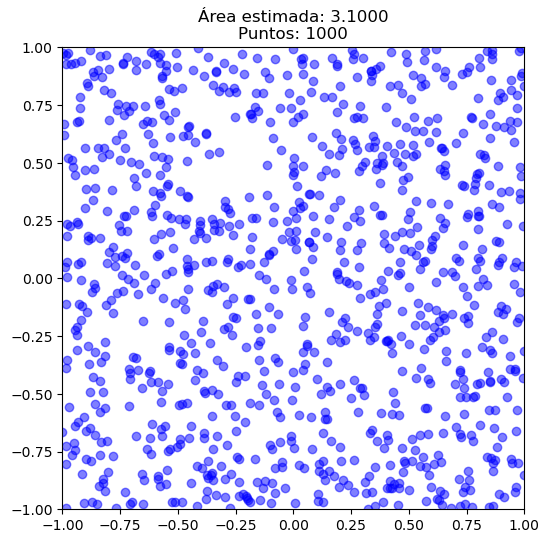

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def circle_montecarlo_animation(num_samples: int, radius: float = 1.0):
    # Generamos puntos aleatorios uniformemente dentro del cuadrado [-r, r]^2
    points = np.random.uniform(-radius, radius, size=(num_samples, 2))
    
    # Calculamos la distancia al origen (norma) para cada punto
    distances_squared = np.sum(points**2, axis=1)
    inside_count = 0

    # Configuramos la figura y los ejes para la animación
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.set_xlim([-radius, radius])
    ax.set_ylim([-radius, radius])
    ax.set_aspect('equal', adjustable='box')

    # Inicializamos el scatter plot y el título
    scat = ax.scatter([], [], c='b', marker='o', alpha=0.5)
    title = ax.set_title('')

    def update(frame):
        nonlocal inside_count
        # Contamos cuántos puntos están dentro del círculo (distancia^2 <= r^2)
        if distances_squared[frame] <= radius**2:
            inside_count += 1

        # Estimación del área del círculo
        estimated_area = (inside_count / (frame + 1)) * (2 * radius) ** 2
        
        # Actualizamos los puntos y el título en cada frame
        scat.set_offsets(points[:frame+1])
        title.set_text(f'Área estimada: {estimated_area:.4f}\nPuntos: {frame+1}')
        return scat, title

    # Creamos la animación
    ani = animation.FuncAnimation(fig, update, frames=num_samples, interval=100, blit=True)
    
    # Guardamos la animación como un GIF
    ani.save('circle_montecarlo.gif', writer='imagemagick')

# Ejecutamos la función para generar el GIF
circle_montecarlo_animation(num_samples=1000)